## kerasでは下記のようなこともできます

+ モデルの保存と読み込み
+ 学習過程の可視化
+ 学習の早期終了
+ 最適なモデルの選択

# データ生成

In [25]:
# 連続値データの読み込み
from sklearn.datasets import load_iris
iris = load_iris()

# 訓練データとテストデータに分ける
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], test_size=0.3,  random_state=0)

"""
# 標準化（Standardization）
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test) 
scaler = StandardScaler()
y_train_s = scaler.fit_transform(y_train.reshape(len(y_train),1))
y_test_s = scaler.transform(y_test.reshape(len(y_test),1)) 
"""

# 正規化（Normarization）
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler()
X_train_n = scaler_x.fit_transform(X_train)
X_test_n = scaler_x.transform(X_test) 

# one-hotベクトル化
import keras
y_train = keras.utils.to_categorical(y_train,3)
y_test = keras.utils.to_categorical(y_test,3)

# 学習の可視化

In [26]:
# 必要ライブラリのインポート
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.layers import normalization
from keras import losses
from keras import optimizers
from keras import callbacks

import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
# モデル生成
model = Sequential()

# 層の追加
layers=[
    Dense(128, activation='relu'),
    Dropout(0.01),
    normalization.BatchNormalization(),
    Dense(128, activation='relu'),
    Dropout(0.01),
    normalization.BatchNormalization(),
    Dense(64, activation='relu'),
    Dense(3, activation='linear')
]
for layer in layers:
    model.add(layer)

# モデルの学習設定

model.compile(
    loss=losses.mean_squared_error,
    optimizer=optimizers.Adam(),
    metrics=['acc']
)

# モデルの学習
result = model.fit(
    X_train_n,
    y_train,
    batch_size=32,
    epochs=100
)

Epoch 1/100
105/105 [==============================] - 1s 8ms/step - loss: 1.0826 - acc: 0.4571
Epoch 2/100
105/105 [==============================] - 0s 177us/step - loss: 0.3893 - acc: 0.8095
Epoch 3/100
105/105 [==============================] - 0s 145us/step - loss: 0.2573 - acc: 0.8476
Epoch 4/100
105/105 [==============================] - 0s 150us/step - loss: 0.1895 - acc: 0.8095
Epoch 5/100
105/105 [==============================] - 0s 195us/step - loss: 0.2322 - acc: 0.8667
Epoch 6/100
105/105 [==============================] - 0s 179us/step - loss: 0.1389 - acc: 0.9143
Epoch 7/100
105/105 [==============================] - 0s 118us/step - loss: 0.1781 - acc: 0.9048
Epoch 8/100
105/105 [==============================] - 0s 176us/step - loss: 0.1105 - acc: 0.9429
Epoch 9/100
105/105 [==============================] - 0s 194us/step - loss: 0.1256 - acc: 0.9143
Epoch 10/100
105/105 [==============================] - 0s 117us/step - loss: 0.1102 - acc: 0.9238
Epoch 11/100
105/105 

105/105 [==============================] - 0s 171us/step - loss: 0.0310 - acc: 0.9810
Epoch 84/100
105/105 [==============================] - 0s 148us/step - loss: 0.0334 - acc: 0.9714
Epoch 85/100
105/105 [==============================] - 0s 145us/step - loss: 0.0273 - acc: 1.0000
Epoch 86/100
105/105 [==============================] - 0s 181us/step - loss: 0.0245 - acc: 1.0000
Epoch 87/100
105/105 [==============================] - 0s 210us/step - loss: 0.0275 - acc: 0.9810
Epoch 88/100
105/105 [==============================] - 0s 161us/step - loss: 0.0353 - acc: 0.9714
Epoch 89/100
105/105 [==============================] - 0s 184us/step - loss: 0.0320 - acc: 0.9810
Epoch 90/100
105/105 [==============================] - 0s 153us/step - loss: 0.0332 - acc: 0.9619
Epoch 91/100
105/105 [==============================] - 0s 184us/step - loss: 0.0302 - acc: 1.0000
Epoch 92/100
105/105 [==============================] - 0s 175us/step - loss: 0.0333 - acc: 0.9905
Epoch 93/100
105/105 [=

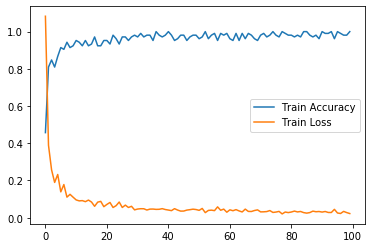

In [37]:
# 描画データ
acc = result.history['acc']  # 学習データの正答率
loss = result.history['loss']  # 学習データの損失

# x軸
epochs = range(len(acc))

# 図示
plt.plot(epochs, acc, label='Train Accuracy')
plt.plot(epochs, loss, label='Train Loss')
plt.legend()
plt.show()

# モデルの再利用

学習したモデルは、保存できます。

保存したモデルは、使用したいときにプログラムから読み込み利用できます。

In [38]:
# モデルの保存
model.save('./model/model.h5')

In [39]:
# モデルの読み込み
model = keras.models.load_model('./model/model.h5')

In [40]:
# 予測値の算出
import numpy as np
y_predict = np.argmax(model.predict(X_test_n),axis=1)
print(y_predict)

[2 1 0 1 0 2 0 1 1 1 1 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 1 1 0 1 2 1 0
 2 1 1 2 0 2 0 0]


# コールバック

コールバックは訓練中で適用される関数集合です。訓練中にモデル内部の状態と統計量を可視化する際に、コールバックを使います。


> コールバックについて紹介する前に、データセットの種類について紹介します。
> 
> + **訓練データ**：重み更新に使用する。
> + **テストデータ**：モデル性能の検証に利用する。
> + **検証データ(バリデーションデータ)**：学習の早期終了（EarlyStopping）やハイパーパラメータの調整に利用する
> 
> ＊ ほとんどの場合、ハイパーパラメータの調整は、訓練データを用いて行うため、気にしなくてよいが、学術的なデータ解析の際には、検証用データも使用する。ほとんどの実務的な場合においては、検証データは、学習の早期終了などに用いられると考えてよい。


**学習の早期終了（EarlyStopping）**：バリデーションデータへの精度に基づいて、改善しなかった場合は、学習を早期に打ち切り、過学習の防止に務める。

**学習過程の保存（ModelCheckpoint）**：学習の途中経過を記録しておく。今まで見てきた手法では、学習終了時点のモデルを採用し、予測値の算出を行ったが、学習途中の精度が良い場合がある。そのような場合は、このModelCheckpointで記録しておいたモデルの中から、最も精度のいいモデルを採用する。

### 学習の早期終了（EarlyStopping）

In [44]:
# モデル生成
model = Sequential()

# 層の追加
layers=[
    Dense(128, activation='relu'),
    Dropout(0.01),
    normalization.BatchNormalization(),
    Dense(128, activation='relu'),
    Dropout(0.01),
    normalization.BatchNormalization(),
    Dense(64, activation='relu'),
    Dense(3, activation='linear')
]
for layer in layers:
    model.add(layer)

# モデルの学習設定

model.compile(
    loss=losses.mean_squared_error,
    optimizer=optimizers.Adam(),
    metrics=['acc']
)

# モデルの学習
result = model.fit(
    X_train_n,
    y_train,
    batch_size=32,
    epochs=100, 
    validation_data=(X_test_n,y_test),
    callbacks=[callbacks.EarlyStopping(monitor='val_loss')]
)

Train on 105 samples, validate on 45 samples
Epoch 1/100
105/105 [==============================] - 1s 9ms/step - loss: 1.1107 - acc: 0.2571 - val_loss: 0.3015 - val_acc: 0.6222
Epoch 2/100
105/105 [==============================] - 0s 271us/step - loss: 0.3688 - acc: 0.7238 - val_loss: 0.2978 - val_acc: 0.4444
Epoch 3/100
105/105 [==============================] - 0s 257us/step - loss: 0.3058 - acc: 0.8000 - val_loss: 0.3024 - val_acc: 0.3556


### 学習過程の保存（ModelCheckpoint）

In [48]:
# モデル生成
model = Sequential()

# 層の追加
layers=[
    Dense(128, activation='relu'),
    Dropout(0.01),
    normalization.BatchNormalization(),
    Dense(128, activation='relu'),
    Dropout(0.01),
    normalization.BatchNormalization(),
    Dense(64, activation='relu'),
    Dense(3, activation='linear')
]
for layer in layers:
    model.add(layer)

# モデルの学習設定

model.compile(
    loss=losses.mean_squared_error,
    optimizer=optimizers.Adam(),
    metrics=['acc']
)

# モデルの学習
result = model.fit(
    X_train_n,
    y_train,
    batch_size=32,
    epochs=10,
    validation_data=(X_test_n,y_test),
    callbacks=[
        callbacks.ModelCheckpoint(
            filepath = './model/best_model.h5', 
            monitor='val_loss', 
            save_best_only=True
        )
    ]
)

Train on 105 samples, validate on 45 samples
Epoch 1/10
105/105 [==============================] - 1s 9ms/step - loss: 1.0035 - acc: 0.5143 - val_loss: 0.3081 - val_acc: 0.5333
Epoch 2/10
105/105 [==============================] - 0s 257us/step - loss: 0.3500 - acc: 0.7810 - val_loss: 0.3114 - val_acc: 0.5556
Epoch 3/10
105/105 [==============================] - 0s 208us/step - loss: 0.2636 - acc: 0.8286 - val_loss: 0.3091 - val_acc: 0.2444
Epoch 4/10
105/105 [==============================] - 0s 170us/step - loss: 0.2155 - acc: 0.8190 - val_loss: 0.3042 - val_acc: 0.1333
Epoch 5/10
105/105 [==============================] - 0s 186us/step - loss: 0.1540 - acc: 0.8762 - val_loss: 0.2980 - val_acc: 0.6444
Epoch 6/10
105/105 [==============================] - 0s 167us/step - loss: 0.1752 - acc: 0.9143 - val_loss: 0.3013 - val_acc: 0.5556
Epoch 7/10
105/105 [==============================] - 0s 178us/step - loss: 0.1536 - acc: 0.8857 - val_loss: 0.3087 - val_acc: 0.4222
Epoch 8/10
105/105 

In [49]:
# 最適モデルの読み込み
model = keras.models.load_model('./model/best_model.h5')
y_predict = model.predict(X_test_n)
print(y_predict)

[[-0.01371501  0.05781257  0.11274462]
 [-0.05074779  0.11451527  0.02457817]
 [ 0.01425614  0.12905385  0.03095945]
 [-0.02256905  0.05142786  0.09610461]
 [ 0.02275731  0.16434728  0.00699136]
 [-0.01361593  0.0450052   0.11557581]
 [ 0.01538035  0.15863566  0.01513015]
 [-0.01266305  0.09552823  0.05255752]
 [-0.01925175  0.09674596  0.05075194]
 [-0.02132894  0.10802321  0.03320903]
 [-0.06206846  0.07125149  0.06510168]
 [-0.01452348  0.09577344  0.0453081 ]
 [-0.04238757  0.09769621  0.03864059]
 [-0.01667581  0.09330025  0.05140485]
 [-0.03310471  0.09284583  0.04191725]
 [ 0.018277    0.15329677  0.02488557]
 [-0.02472035  0.09143577  0.03956375]
 [-0.04654752  0.10320313  0.04875309]
 [ 0.02058045  0.1739071  -0.01067793]
 [ 0.01055315  0.1433636   0.01640802]
 [-0.02287458  0.06613136  0.09358028]
 [-0.02388323  0.09409247  0.0478612 ]
 [ 0.01249383  0.16261445  0.0130546 ]
 [ 0.0133974   0.1732456  -0.00897575]
 [-0.0199873   0.07348914  0.06244871]
 [ 0.01124032  0.15023285

# 自作のコールバック関数

コールバック関数は、自作したものを使用することもできる。

今回は、EPOCH毎に、精度を描画するコールバック関数を実装する。

In [50]:
class LossHistory(keras.callbacks.Callback):
    def __init__(self):
        # 各epoch毎にlossを格納していく
        self.loss = []

    def on_epoch_end(self, epoch, logs={}):
        """各epoch終了ごとに呼び出される
        """
        # lossを格納
        self.loss.append(logs['loss'])
        
        # グラフ初期化
        clear_output(wait = True)
        
        # グラフ描画部
        plt.figure(num=1, clear=True)
        plt.title('loss')
        plt.xlabel('epoch')
        plt.ylabel('loss')
        plt.plot(self.loss, label='train')
        plt.pause(0.1)

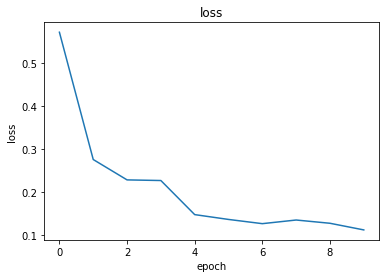

In [53]:
# 必要ライブラリのインポート
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras import losses
from keras import optimizers
from keras import callbacks
import os
from IPython.display import clear_output

# モデル生成
model = Sequential()

# 層の追加
layers=[
    Dense(128, activation='relu'),
    Dropout(0.01),
    normalization.BatchNormalization(),
    Dense(128, activation='relu'),
    Dropout(0.01),
    normalization.BatchNormalization(),
    Dense(64, activation='relu'),
    Dense(3, activation='linear')
]
for layer in layers:
    model.add(layer)

# モデルの学習設定

model.compile(
    loss=losses.mean_squared_error,
    optimizer=optimizers.Adam(),
    metrics=['acc']
)

# モデルの学習
result = model.fit(
    X_train_n,
    y_train,
    batch_size=32,
    epochs=10,
    verbose=False,
    validation_data=(X_test_n,y_test),
    callbacks=[
        LossHistory()
    ]
)